Ejercicio Sesion 4

In [13]:
#Importacion de paquetes y descarga de data
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('churn.txt', sep=",")
data.columns


Index(['Account Length', 'Area Code', 'Phone', 'Intl Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

In [14]:
#Creacion de variable dummy de plan de internet
dummy=pd.get_dummies(data["Intl Plan"])
#data=pd.concat([data,dymmy], axis=1)    
data['InternetPlan']=dummy['yes']

#Creacion de variable dummy de plan de internet
dummy2=pd.get_dummies(data["Churn?"])
#data=pd.concat([data,dymmy], axis=1)    
data['Churn']=dummy2['True.']

#data['Churn']





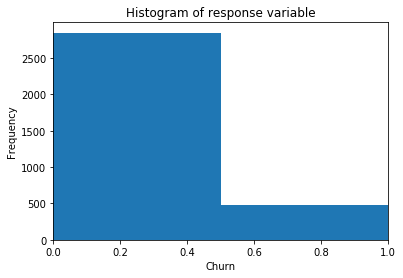

In [15]:
#4.1 Cree Y y X, Cual es la distribución de los churners?, Divida el dataset en train (70%) and test (30%)
#X y Y
y = data['Churn']
n_samples = y.shape[0]

feature_cols = ['Day Mins','Eve Calls','InternetPlan']

X = data[feature_cols]
X_ = np.c_[np.ones(n_samples), X]

#distribucion de y
#a
y.value_counts().sort_index()
#b

#n=math.ceil(math.sqrt(n_samples))
n=2
plt.hist(y, bins=n)
plt.xlim(0, 1)
plt.title('Histogram of response variable')
plt.xlabel('Churn')
plt.ylabel('Frequency')

#Diviidar base en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.25)


In [16]:
#4.2 Entrene una regresion logistica usando el set de train y aplique el algoritmo en el set de test
logreg = LogisticRegression(solver='liblinear',C=1e9)
logreg.fit(X_train, y_train)
y_pred_class = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]





In [67]:
#4.3 Cree la matriz de confusion, Estime el accuracy y otras medidas desempeño
#Matriz de confusion
confusion =metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

#null accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

#accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

#Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

#Sensitivity/Recall/true positive rate
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

#Specificity/true negative rate
print(TN / float(TN + FP))

#Presition
#print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

[[702  17]
 [104  11]]
0.854916067146283
0.854916067146283
0.145083932853717
0.09565217391304348
0.9763560500695411
0.39285714285714285
